In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# POST to API
payload = {'code': 'ALL'} # or {'code': 'DE'}
URL = 'https://api.statworx.com/covid'
response = requests.post(url=URL, data=json.dumps(payload)) #dumps convert python object into string

# Convert to data frame
df = pd.DataFrame.from_dict(json.loads(response.text)) #loads used to parse a valid JSON string and convert it into a Python Dictionary.
print(df.head())

         date day month  year  cases  deaths      country code  population  \
0  2019-12-31  31    12  2019      0       0  Afghanistan   AF  38041757.0   
1  2020-01-01  01    01  2020      0       0  Afghanistan   AF  38041757.0   
2  2020-01-02  02    01  2020      0       0  Afghanistan   AF  38041757.0   
3  2020-01-03  03    01  2020      0       0  Afghanistan   AF  38041757.0   
4  2020-01-04  04    01  2020      0       0  Afghanistan   AF  38041757.0   

  continent  cases_cum  deaths_cum  
0      Asia          0           0  
1      Asia          0           0  
2      Asia          0           0  
3      Asia          0           0  
4      Asia          0           0  


In [2]:
# Wrangle Data frame
group = {'cases': ['sum'], 'deaths': ['sum']}
df2 = df.groupby(['country']).agg(group)
df2 = df2.reset_index()
df2.columns = df2.columns.droplevel(1)
df2

,country,cases,deaths
0,Afghanistan,49273,1971
1,Albania,48530,1003
2,Algeria,92102,2596
3,Andorra,7338,79
4,Angola,16188,371
...,...,...,...
209,Wallis_and_Futuna,3,0
210,Western_Sahara,766,1
211,Yemen,2083,606
212,Zambia,18274,367


In [3]:
# Get desired countries from user
countries = []
stop = False
while not stop:
    user_input = str(input("Enter country or Enter Q to quit: "))
    if user_input.lower() == "Q".lower():
        stop = True
    else: 
        countries.append(user_input) 
print(countries)
plot_df = df2[df2['country'].isin(countries)]
plot_df

['Albania']


,country,cases,deaths
1,Albania,48530,1003


Text(0, 0.5, 'Total Cases')

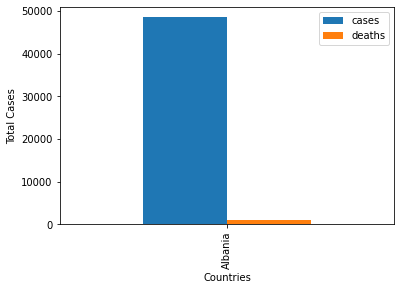

In [4]:
# Plot Bar Graph
plot_df.plot.bar(x = 'country', y = ['cases', 'deaths'], rot=90)
plt.xlabel("Countries")
plt.ylabel("Total Cases")

In [5]:

group = {'cases': ['sum'], 'deaths': ['sum']}
df = df.groupby(['country']).agg(group)
df

,cases,deaths
,sum,sum
country,,
Afghanistan,49273,1971
Albania,48530,1003
Algeria,92102,2596
Andorra,7338,79
Angola,16188,371
...,...,...
Wallis_and_Futuna,3,0
Western_Sahara,766,1


In [6]:
df['country']='Angola'
df.head()

,cases,deaths,country
,sum,sum,
country,,,
Afghanistan,49273,1971,Angola
Albania,48530,1003,Angola
Algeria,92102,2596,Angola
Andorra,7338,79,Angola
Angola,16188,371,Angola


In [7]:
df.keys

<bound method NDFrame.keys of                    cases deaths country
                     sum    sum        
country                                
Afghanistan        49273   1971  Angola
Albania            48530   1003  Angola
Algeria            92102   2596  Angola
Andorra             7338     79  Angola
Angola             16188    371  Angola
...                  ...    ...     ...
Wallis_and_Futuna      3      0  Angola
Western_Sahara       766      1  Angola
Yemen               2083    606  Angola
Zambia             18274    367  Angola
Zimbabwe           11246    307  Angola

[214 rows x 3 columns]>

In [8]:
df.describe


<bound method NDFrame.describe of                    cases deaths country
                     sum    sum        
country                                
Afghanistan        49273   1971  Angola
Albania            48530   1003  Angola
Algeria            92102   2596  Angola
Andorra             7338     79  Angola
Angola             16188    371  Angola
...                  ...    ...     ...
Wallis_and_Futuna      3      0  Angola
Western_Sahara       766      1  Angola
Yemen               2083    606  Angola
Zambia             18274    367  Angola
Zimbabwe           11246    307  Angola

[214 rows x 3 columns]>

In [9]:
df.keys

<bound method NDFrame.keys of                    cases deaths country
                     sum    sum        
country                                
Afghanistan        49273   1971  Angola
Albania            48530   1003  Angola
Algeria            92102   2596  Angola
Andorra             7338     79  Angola
Angola             16188    371  Angola
...                  ...    ...     ...
Wallis_and_Futuna      3      0  Angola
Western_Sahara       766      1  Angola
Yemen               2083    606  Angola
Zambia             18274    367  Angola
Zimbabwe           11246    307  Angola

[214 rows x 3 columns]>